<a href="https://colab.research.google.com/github/sh-shmss/from_scratch/blob/master/ml_from_scratch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# from sklearn import datasets # will use this later.
import numpy as np
import matplotlib.pyplot as plt
import random
import matplotlib.animation as animation
from IPython.display import HTML

# Linear Regression

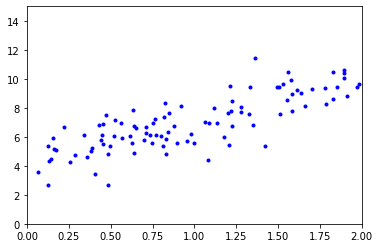

In [8]:
# generate random data

X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)
plt.plot(X, y, "b.")
plt.axis([0, 2, 0, 15])
plt.show()

In [0]:
# train the linear regressor

thetas = []
errors = []
m = X.shape[0]
n = y.shape[1]
lr = 1e-1
steps = 100

theta = np.random.rand(2,n)
X_b = np.c_[np.ones((m,1)), X]

batch_size = 10
seed = [random.randint(0, m-1) for i in range(batch_size)]

y_batch = y[seed]
X_b = X_b[seed]

for i in range(steps):
  grads = 2/m * X_b.T.dot(X_b.dot(theta)-y_batch)
  theta = theta - lr * grads
  error = (X_b.dot(theta)-y_batch) ** 2
  error = error.mean()
  errors.append(error)
  thetas.append(theta)

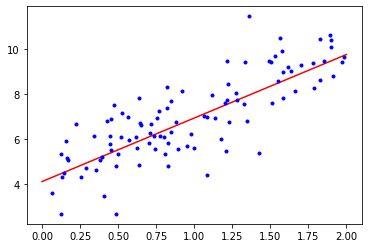

In [10]:
# test the model

X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2,1)), X_new]
y_predict = X_new_b.dot(theta) 
plt.plot(X_new, y_predict, 'r-')
plt.plot(X,y, 'b.')
plt.show()

In [11]:
# animate training process

fig, ax = plt.subplots()

X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2,1)), X_new]

line, = ax.plot(X_new, X_new_b.dot(thetas[i]), '-r')
text = ax.text(0.5, 0.1, "", bbox={'facecolor':'green', 'alpha':0.4, 'pad':5},
                transform=ax.transAxes)
plt.plot(X, y, "b.")


def animate(i):
    error = errors[i]
    text.set_text(f'MSE: {error}')
    y_predict = X_new_b.dot(thetas[i]) 
    line.set_data(X_new, y_predict)
    return line,


ani = animation.FuncAnimation(
    fig, animate, interval=50, save_count=steps)

plt.close()
HTML(ani.to_jshtml())

In [13]:
HTML(ani.to_html5_video())

# Logistic Regression